In [1]:
%pylab inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime

Populating the interactive namespace from numpy and matplotlib


/home/tomas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
plt.rcParams.update({'font.size': 24})
plt.rcParams['figure.figsize'] = [15, 10]
paleta = mpl.cm.viridis

In [3]:
tweets_df = pd.read_csv('csv_files/tweets_por_dia.csv')
tweets_df.fecha = pd.to_datetime(tweets_df.fecha)
tweets_df.head()

,fecha,cantidad
0,2016-03-14,619
1,2016-03-13,246701
2,2016-03-10,1204122
3,2015-12-23,86748
4,2016-01-06,91615


In [4]:
tweets_ts = pd.Series(data=tweets_df.cantidad.values, index=tweets_df.fecha.values)
tweets_ts = tweets_ts.sort_index()
tweets_ts.head()

2015-01-01    5070
2015-01-02    4211
2015-01-03    3811
2015-01-04    3835
2015-01-05    4473
dtype: int64

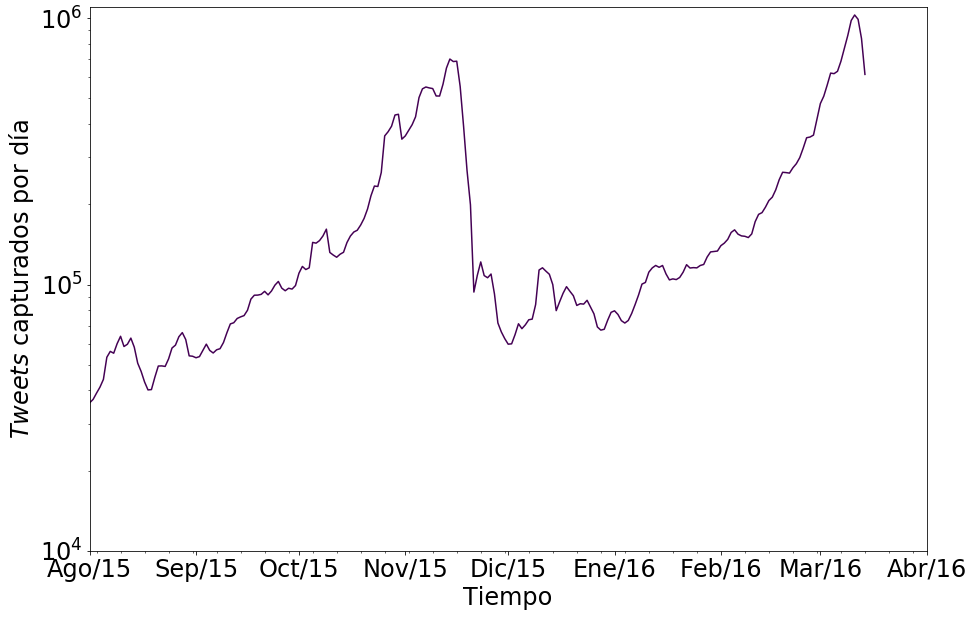

In [5]:
plt.rcParams.update({'font.size': 24})
plt.rcParams['figure.figsize'] = [15, 10]

ax = plt.axes()
ax.set_prop_cycle('color',[paleta(i) for i in np.linspace(0, 1, 1)])

tweets_ts.rolling(5).mean().plot(xlim=('2015-08-01', '2016-04-01'), ylim=(10**4,1.1*10**6), logy=True);
x_ticks = [datetime.datetime(2015,8,1), datetime.datetime(2015,9,1), datetime.datetime(2015,10,1), datetime.datetime(2015,11,1),
    datetime.datetime(2015,12,1), datetime.datetime(2016,1,1), datetime.datetime(2016,2,1), datetime.datetime(2016,3,1), datetime.datetime(2016,4,1)]
x_labels = ["Ago/15","Sep/15", "Oct/15","Nov/15", "Dic/15", "Ene/16", "Feb/16", "Mar/16", "Abr/16"]
plt.xticks(x_ticks, x_labels)
plt.xlabel("Tiempo")
plt.ylabel(u"$\\it{Tweets}$ capturados por día")
resultado = plt.plot()

In [6]:
followers = pd.read_csv('csv_files/followers.csv')
followers.head()

,follower_id,followed_id
0,240934,137027
1,175625,137027
2,227929,137027
3,87299,137027
4,8534,137027


In [7]:
# IN Degree: aristas entrantes a un nodo
in_degree = followers.groupby("followed_id").count().reset_index()
in_degree.columns = ["user_index", "cantidad"]

# OUT Degree: aristas salientes de un nodo
out_degree = followers.groupby("follower_id").count().reset_index()
out_degree.columns = ["user_index", "cantidad"]

todos_df = in_degree.merge(out_degree, left_on="user_index", right_on="user_index")
todos_df.head()

,user_index,cantidad_x,cantidad_y
0,0,299,39
1,2,99,24
2,3,63,6
3,4,173,1
4,5,12,23


In [8]:
ecdf_in = sm.distributions.ECDF(in_degree.cantidad)
ecdf_out = sm.distributions.ECDF(out_degree.cantidad)

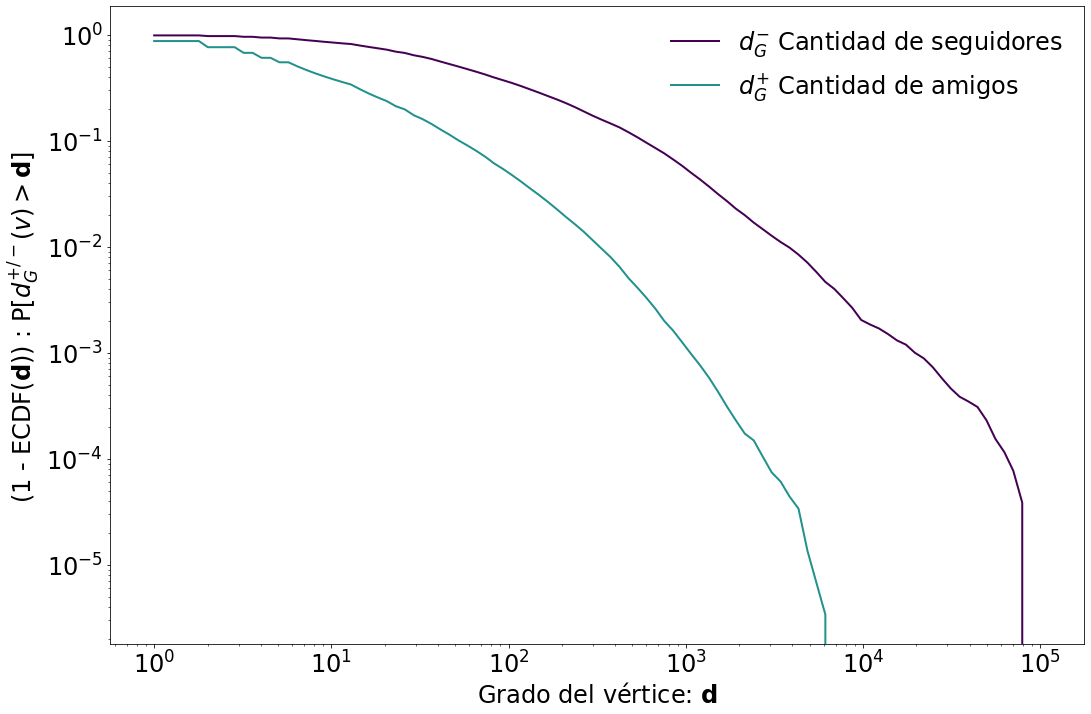

In [9]:
x = np.logspace(0,np.ceil(np.log10(max(np.concatenate([in_degree.cantidad, out_degree.cantidad])))),100)
y_in = ecdf_in(x)
y_out = ecdf_out(x)

ax = plt.axes()
ax.set_prop_cycle('color',[paleta(i) for i in np.linspace(0, 1, 3)])

plt.plot(x, 1-y_in, linewidth=2, label="$d_{G}^{-}$ Cantidad de seguidores")
plt.plot(x, 1-y_out, linewidth=2, label="$d_{G}^{+}$ Cantidad de amigos")
plt.tight_layout()
plt.legend(frameon=False)
plt.xlabel(u"Grado del vértice: $\\bf{d}$")
plt.ylabel("(1 - ECDF($\\bf{d}$)) : P[$d_{G}^{+/-}(v) > \\bf{d} $] ")
resultado = plt.loglog()

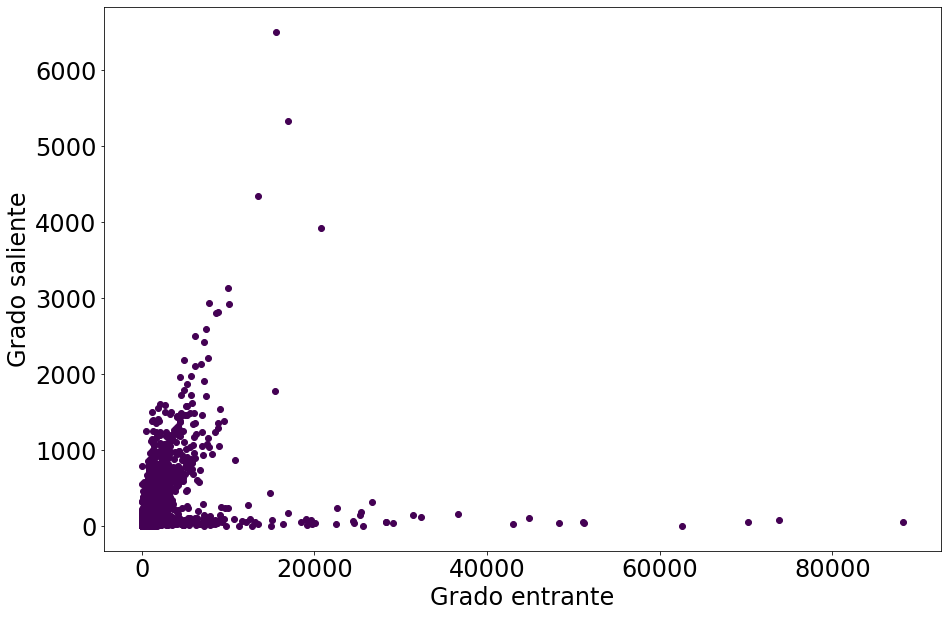

In [10]:
ax = plt.axes()
ax.set_prop_cycle('color',[paleta(i) for i in np.linspace(0, 1, 1)])
plt.xlabel("Grado entrante")
plt.ylabel("Grado saliente")
resultado = plt.scatter(todos_df["cantidad_x"], todos_df["cantidad_y"])